In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
plt.rcParams['axes.unicode_minus']=False

In [2]:
class KNeighborsClassifier():
    def __init__(self, k=10):
        """
        k         最近邻个数
        """
        self.k = k
        
    def fit(self, X, y):
        # 训练并不需要花太多时间
        self.X = X
        self.y = y
    
    def predict(self, X):
        res = []
        for x in X:
            # 计算平方和
            sum = np.sum((x-self.X)**2, axis=1)
            num = np.argsort(sum)[:self.k]
            pred_y = np.argmax(np.bincount(self.y[num]))
            res.append(pred_y)
        return np.array(res)

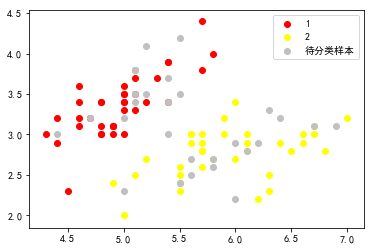

In [3]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

train_x,test_x,train_y,test_y = train_test_split(X, y, test_size=0.3, random_state=1)

color = ['red','yellow']
plt.rcParams['font.sans-serif'] = ['SimHei'] 
for i in range(2):
    plt.scatter(train_x[train_y==i,0], train_x[train_y==i,1], color=color[i])

plt.scatter(test_x[:,0], test_x[:,1],color='silver')
plt.legend([1,2,'待分类样本'])

In [4]:
clf = KNeighborsClassifier(k=20)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
accuracy_score(test_y, pred_y)

1.0

# k值的选取问题

KFold的简单用法：

kf = KFold(n_splits=5) 定义5折交叉

kf.split(X) 对X进行分割，返回迭代器，五个元素，每个元素是训练及测试的数据集的索引

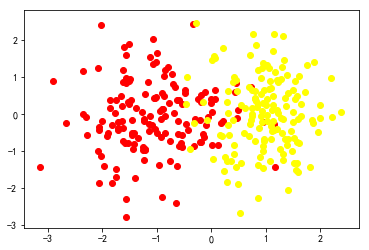

In [6]:
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=300, n_features=5, shuffle=True, random_state=6, n_classes=2) 

color = ['red','yellow']
for i in range(2):
    plt.scatter(X[y==i,0], X[y==i,1], color=color[i])


<ErrorbarContainer object of 3 artists>

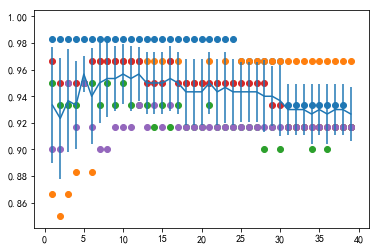

In [7]:
kf = KFold(n_splits=5)

accuracy = []
for i in range(1,40):
    acc = []
    for train_index, test_index in kf.split(X):
        train_x,train_y = X[train_index],y[train_index]
        test_x,test_y = X[test_index],y[test_index]
        clf = KNeighborsClassifier(k=i)
        clf.fit(train_x,train_y)
        pred_y = clf.predict(test_x)
        acc.append(sum(pred_y==test_y)/len(pred_y))
    accuracy.append(acc)
        
accuracy = np.array(accuracy)
m,n = accuracy.shape
for i in range(n):
    plt.scatter(range(1,m+1),accuracy[:,i])
plt.errorbar(range(1,m+1),accuracy.mean(axis=1),accuracy.std(axis=1))